In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import random
import time
import copy
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist,pdist, squareform
data = pd.read_csv('digits-embedding.csv',header=None)
itr_count = 50

In [ ]:
def within_cluster_sum_of_squares(cluster_data):
    squared = cluster_data.distance_to_centroid * cluster_data.distance_to_centroid
    return squared.sum()

def silhouetteCoefficient(cluster_data):
    Features = cluster_data.iloc[:, [2, 3]]
    distbtwnallpoints = squareform(pdist(Features))
    A = np.zeros(len(cluster_data))
    B = np.zeros(len(cluster_data))
    Si = np.zeros(len(cluster_data))
    for i in range(len(cluster_data)):
        cluster = cluster_data.iloc[i]['min_index']
        samecluster = cluster_data[cluster_data['min_index'] == cluster].index.tolist()
        othercluster = cluster_data[cluster_data['min_index'] != cluster].index.tolist()
        A[i] = np.mean(distbtwnallpoints[i][samecluster])
        B[i] = np.mean(distbtwnallpoints[i][othercluster])
        Si[i] = (B[i]-A[i])/max(A[i], B[i])
    return np.mean(Si)

def nmi(cluster_data):
    C = len(cluster_data['label'].unique())
    G = len(cluster_data['min_index'].unique())
    H_C = 0
    H_G = 0
    I_CG = 0
    for i in range(C):
        P_C = float(len(cluster_data[cluster_data['label'] == i]))/float(len(cluster_data))
        H_C += (-1*P_C*np.log(P_C+0.00001))
        for cluster in range(G):
            P_G = float(len(cluster_data[cluster_data['min_index'] == cluster]))/float(len(cluster_data))
            if i == 0:
                H_G += (-1*P_G*np.log(P_G+0.00001))
            P_CG = float(len(cluster_data[(cluster_data['label'] == i) & \
                                          (cluster_data['min_index'] == cluster)]))/ float(len(cluster_data))
            I_CG += (P_CG*np.log((P_CG/(P_C*P_G))+0.00001))
    nmi = I_CG/(H_C+H_G)
    return nmi
def kmeans(data,itr_count,K,seed_val):
    np.random.seed(seed_val)
    cluster_data = data.iloc[:, [2, 3]]
    random_points =  np.random.randint(0,cluster_data.shape[0], size=K)
    centroids = np.array(cluster_data.ix[random_points])
    centroids_prev = np.zeros((K,2))
    euclidean = np.zeros((len(cluster_data),len(centroids)))
    arr_data = np.array(cluster_data)
    itr = 0
    for i in range(itr_count):
        for i in range(len(cluster_data)):
            for j in range(len(centroids)):
                euclidean[i][j] =  np.linalg.norm(arr_data[i]- centroids[j])
        min_index = np.argmin(euclidean,axis=1)
        cluster_data['min_index'] = min_index
        cluster_data['distance_to_centroid'] = euclidean.min(axis=1)
        if itr < 49:
            for i in range(K):
                temp = cluster_data[cluster_data['min_index']== i]
                temp1 =  temp[[2,3]]
                centroids[i] = np.mean(temp1)   
        if np.array_equal(centroids_prev,centroids) is True:
            itr = itr +1
            break
        else:
            centroids_prev = copy.deepcopy(centroids) 
            itr = itr +1
    cluster_data['label'] = data[1]
    cluster_data['image_id'] = data[0]
    WC_SSD = within_cluster_sum_of_squares(cluster_data)
    SC = silhouetteCoefficient(cluster_data)
    NMI = nmi(cluster_data)
    return WC_SSD,SC, NMI

def kloop(data,seed_val):
    for i in [2,4,8,16,32]:
        print "K-VAL",i
        WC_SSD,SC, NMI = kmeans(data,itr_count,i,seed_val)
        print "WC-SSD:",WC_SSD
        print "SC:",SC
        print "NMI:",NMI
print "Total dataset"
for i in range(10):
    print i
    kloop(data,i)    

Total dataset
0
K-VAL 2
WC-SSD: 8983899.999516198
SC: 0.3736113963526712
NMI: 0.17492613594521755
K-VAL 4


In [ ]:
{0: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 1: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 2: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 3: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 4: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 5: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 6: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 7: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 8: {8: 335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}, 9: {8:
335733.13198965101, 16: 184248.51627225231, 2: 4975048.3899274319, 4: 623865.31116823317, 32: 84269.728725130451}}

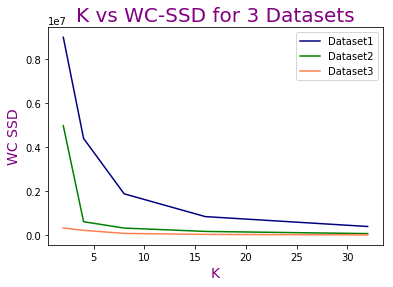

In [2]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

x = np.array([2,4,8,16,32])

y = np.round(np.array([8983899.9995161984,4398977.8396483399,1887621.7327022392,855453.19122656272,407945.05260677205]),3)

y1 = np.round(np.array([4975048.3899274319,623865.31116823317,335733.13198965101,184248.51627225231,84269.728725130451]),3)

y2 = np.round(np.array([340372.41942807235,234388.57241930984,94277.20776570888,48931.980593146582,25965.939307835339]),3)
#print y
area = np.pi*10

#plt.scatter(x, y, s=area, color = 'purple', alpha=0.5)
plt.plot(x, y, label = 'Dataset1',color = 'navy')
plt.plot(x, y1, label = 'Dataset2',color = 'g',)
plt.plot(x, y2, label = 'Dataset3',color = 'coral',)

plt.title('K vs WC-SSD for 3 Datasets',fontsize=20,color='purple')
plt.xlabel('K',fontsize=14,color='purple')
plt.ylabel('WC SSD',fontsize=14,color='purple')
plt.legend(loc='upper right')
plt.savefig('Fig-2.3.1_WCSSD.pdf',bbox_inches='tight')

plt.autoscale(enable=False, axis='y', tight=True)
plt.show()
plt.close()

In [ ]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

x = np.array([2,4,8,16,32])

y = np.round(np.array([8983899.9995161984,4398977.8396483399,1887621.7327022392,855453.19122656272,407945.05260677205]),3)

y1 = np.round(np.array([4975048.3899274319,623865.31116823317,335733.13198965101,184248.51627225231,84269.728725130451]),3)

y2 = np.round(np.array([0.061446159885829736,0.27191146937014843,0.48314883508933093,0.73893152637155646,0.48314883508933093]),3)
#print y
area = np.pi*10

#plt.scatter(x, y, s=area, color = 'purple', alpha=0.5)
plt.plot(x, y, label = 'Dataset1',color = 'navy')
plt.plot(x, y1, label = 'Dataset2',color = 'g',)
plt.plot(x, y2, label = 'Dataset3',color = 'coral',)

plt.title('K vs WC-SSD for 3 Datasets',fontsize=20,color='purple')
plt.xlabel('K',fontsize=14,color='purple')
plt.ylabel('WC SSD',fontsize=14,color='purple')
plt.legend(loc='upper right')
plt.savefig('Fig-2.3.1_WCSSD.pdf',bbox_inches='tight')

plt.autoscale(enable=False, axis='y', tight=True)
plt.show()
plt.close()

In [6]:
a = np.array([8983899.9995161984,8983899.9995161984,8983899.9995161984,8983899.9995161984,8983899.9995161984])
np.std(a)

0.0

In [7]:
def visualizeFeatures(data, labelVals):
	N = len(data)
	examples = np.random.randint(0, N, size=1000)
	dataExamples = data.iloc[examples]
	numLabels = len(data['cluster'].unique())
	dataExamples = dataExamples.groupby('cluster')
	fig, ax = plt.subplots()

	for i in range(numLabels):
		featureX = dataExamples.get_group(labelVals[i]).featureX
		featureY = dataExamples.get_group(labelVals[i]).featureY
		ax.scatter(featureX, featureY, c=colors[i], label=labelVals[i])

	ax.legend()
	plt.title("Clustered Data")
	plt.ylabel('Image Embedding Feature Y')
	plt.xlabel('Image Embedding Feature X')
	plt.show()
	plt.close()


np.random.seed(0)
K = 8
N = len(data)
clusteredData, centroids = kmeans(digitsData, K, N)
nmi1 = nmi(clusteredData)
print('NMI Dataset 1: ' + str(nmi1))
visualizeFeatures(clusteredData, [0,1,2,3,4,5,6,7,8,9])

del clusteredData, centroids

K = 4
N = len(digitsData1)
clusteredData, centroids = kmeans(digitsData1, K, N)
nmi2 = nmi(clusteredData)
print('NMI Dataset 2: ' + str(nmi2))
visualizeFeatures(clusteredData, [0,1,2,3])

del clusteredData, centroids

K = 4
N = len(digitsData2)
clusteredData, centroids = kmeans(digitsData2, K, N)
nmi3 = nmi(clusteredData)
print('NMI Dataset 3: ' + str(nmi3))
visualizeFeatures(clusteredData, [0,1,2,3,4,5,6,7])

print('Finished 2.2.4')

NameError: name 'digitsData' is not defined